# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env_file_name = "Tennis_Windows_x86_64/Tennis.exe"
# env = UnityEnvironment(file_name=env_file_name)
env = UnityEnvironment(file_name=env_file_name,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('states shape : ',states.shape)
print('Both states look like : ',states)
print(2*states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
states shape :  (2, 24)
Both states look like :  [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
if False:
    total_scores = []
    for i in range(100):                                        # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        t = 0
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            # print('actions : ',actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            t += 1
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}, and {} steps taken'.format(i, np.max(scores),t))
        print(scores)
        total_scores.append(scores)
    print('Average Random Score : ', np.mean(total_scores))
        
def plot_results(results):
    import matplotlib.pyplot as plt
    import torch
    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.all_rewards)), results.all_rewards)
    plt.plot(np.arange(len(results.avg_rewards)), results.avg_rewards)
    plt.ylabel('Rewards')
    plt.xlabel('Episode #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.critic_loss)), results.critic_loss)
    plt.ylabel('critic_losses')
    plt.xlabel('Learn Step #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.actor_loss)), results.actor_loss)
    plt.ylabel('actor_losses')
    plt.xlabel('Learn Step #')
    plt.show()


When finished, you can close the environment.

Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 512
dropout              : 0.01
seed                 : 89
max_episodes         : 2000
learn_every          : 10
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9995
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu
Episode 0 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  1.000 || 0.068 seconds, mem : 15


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 20 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.990 || 0.045 seconds, mem : 299


--------------------------------------
Agent 0 and episode 40 
update - q expected : mean : 0.0479 - sd : 0.0079 min-max 0.0221|0.0613
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0049 - sd : 0.0103 min-max -0.0499|0.0036
Episode 40 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.980 || 0.243 seconds, mem : 583
--------------------------------------
Agent 0 and episode 50 
update - q expected : mean : 0.0109 - sd : 0.0145 min-max -0.0483|0.0366
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0321 - sd : 0.0125 min-max -0.0150|0.0684


--------------------------------------
Agent 0 and episode 60 
update - q expected : mean : 0.0351 - sd : 0.0128 min-max -0.0109|0.0497
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0086 - sd : 0.0075 min-max -0.0312|0.0302
Episode 60 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.970 || 0.105 seconds, mem : 867
--------------------------------------
Agent 0 and episode 70 
update - q expected : mean : 0.0549 - sd : 0.0131 min-max 0.0188|0.0780
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0119 - sd : 0.0099 min-max -0.0588|0.0039


--------------------------------------
Agent 0 and episode 80 
update - q expected : mean : 0.0619 - sd : 0.0126 min-max 0.0326|0.0876
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0198 - sd : 0.0111 min-max -0.0655|-0.0040
Episode 80 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.960 || 0.088 seconds, mem : 1151
--------------------------------------
Agent 0 and episode 90 
update - q expected : mean : 0.0600 - sd : 0.0106 min-max 0.0331|0.0811
update - reward : mean : -0.0002 - sd : 0.0012 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0170 - sd : 0.0100 min-max -0.0655|0.0013


Episode 96 || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.953 || 0.068 seconds, mem : 1392
--------------------------------------
Agent 0 and episode 100 
update - q expected : mean : 0.0553 - sd : 0.0089 min-max 0.0302|0.0707
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0120 - sd : 0.0101 min-max -0.0606|0.0081
Episode 100 || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.951 || 0.088 seconds, mem : 1449
Episode 104 || Reward : [0.09 0.1 ] || avg reward :  0.002 || Noise  0.949 || 0.120 seconds, mem : 1558
Episode 109 || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.946 || 0.071 seconds, mem : 1637
--------------------------------------
Agent 0 and episode 110 
update - q expected : mean : 0.0500 - sd : 0.0082 min-max 0.0186|0.0620
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0061 - sd : 0.0091 min-max -0.0540|0.0163
Episode 110 || Reward :

Episode 114 || Reward : [-0.01  0.1 ] || avg reward :  0.005 || Noise  0.944 || 0.064 seconds, mem : 1732
Episode 117 || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.943 || 0.061 seconds, mem : 1791
Episode 119 || Reward : [-0.01  0.1 ] || avg reward :  0.007 || Noise  0.942 || 0.068 seconds, mem : 1827
--------------------------------------
Agent 0 and episode 120 
update - q expected : mean : 0.0452 - sd : 0.0086 min-max 0.0162|0.0556
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0021 - sd : 0.0108 min-max -0.0528|0.1031
Episode 120 || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.941 || 0.088 seconds, mem : 1841


--------------------------------------
Agent 0 and episode 130 
update - q expected : mean : 0.0411 - sd : 0.0098 min-max 0.0042|0.0530
update - reward : mean : 0.0004 - sd : 0.0078 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0038 - sd : 0.0113 min-max -0.0457|0.1069
Episode 130 || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.937 || 0.103 seconds, mem : 1988
--------------------------------------
Agent 0 and episode 140 
update - q expected : mean : 0.0381 - sd : 0.0110 min-max -0.0008|0.0510
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0200|0.1000
update - TD-Error : mean : 0.0063 - sd : 0.0098 min-max -0.0582|0.1082
Episode 140 || Reward : [-0.02  0.  ] || avg reward :  0.008 || Noise  0.932 || 0.110 seconds, mem : 2135


--------------------------------------
Agent 0 and episode 150 
update - q expected : mean : 0.0367 - sd : 0.0117 min-max -0.0075|0.0506
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0200|0.0000
update - TD-Error : mean : 0.0066 - sd : 0.0100 min-max -0.0561|0.0490
--------------------------------------
Agent 0 and episode 160 
update - q expected : mean : 0.0367 - sd : 0.0123 min-max -0.0123|0.0510
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0068 - sd : 0.0109 min-max -0.0369|0.1094
Episode 160 || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.923 || 0.088 seconds, mem : 2419
--------------------------------------
Agent 0 and episode 170 
update - q expected : mean : 0.0372 - sd : 0.0120 min-max -0.0099|0.0505
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0062 - sd : 0.0092 min-max -0.0373|0.0311


--------------------------------------
Agent 0 and episode 180 
update - q expected : mean : 0.0385 - sd : 0.0113 min-max -0.0079|0.0518
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0054 - sd : 0.0093 min-max -0.0379|0.1052
Episode 180 || Reward : [-0.01  0.  ] || avg reward :  0.008 || Noise  0.913 || 0.097 seconds, mem : 2703
--------------------------------------
Agent 0 and episode 190 
update - q expected : mean : 0.0401 - sd : 0.0105 min-max -0.0008|0.0517
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0024 - sd : 0.0094 min-max -0.0383|0.0261


--------------------------------------
Agent 0 and episode 200 
update - q expected : mean : 0.0416 - sd : 0.0104 min-max -0.0008|0.0517
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0017 - sd : 0.0101 min-max -0.0378|0.1068
Episode 200 || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.904 || 0.111 seconds, mem : 2987
--------------------------------------
Agent 0 and episode 210 
update - q expected : mean : 0.0430 - sd : 0.0096 min-max 0.0061|0.0530
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0094 min-max -0.0397|0.0191


--------------------------------------
Agent 0 and episode 220 
update - q expected : mean : 0.0440 - sd : 0.0095 min-max 0.0023|0.0538
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0086 min-max -0.0362|0.0255
Episode 220 || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.895 || 0.116 seconds, mem : 3271
--------------------------------------
Agent 0 and episode 230 
update - q expected : mean : 0.0444 - sd : 0.0098 min-max 0.0042|0.0556
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0012 - sd : 0.0094 min-max -0.0339|0.1009


--------------------------------------
Agent 0 and episode 240 
update - q expected : mean : 0.0449 - sd : 0.0103 min-max 0.0052|0.0558
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0026 - sd : 0.0080 min-max -0.0513|0.0227
Episode 240 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.886 || 0.086 seconds, mem : 3555
--------------------------------------
Agent 0 and episode 250 
update - q expected : mean : 0.0447 - sd : 0.0109 min-max 0.0069|0.0561
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0017 - sd : 0.0091 min-max -0.0310|0.1001


--------------------------------------
Agent 0 and episode 260 
update - q expected : mean : 0.0438 - sd : 0.0123 min-max 0.0016|0.0559
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0085 min-max -0.0293|0.0556
Episode 260 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.878 || 0.093 seconds, mem : 3839
--------------------------------------
Agent 0 and episode 270 
update - q expected : mean : 0.0437 - sd : 0.0126 min-max -0.0053|0.0555
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0082 min-max -0.0334|0.0287


--------------------------------------
Agent 0 and episode 280 
update - q expected : mean : 0.0435 - sd : 0.0122 min-max 0.0053|0.0549
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0015 - sd : 0.0083 min-max -0.0312|0.0537
Episode 280 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.869 || 0.086 seconds, mem : 4123
--------------------------------------
Agent 0 and episode 290 
update - q expected : mean : 0.0436 - sd : 0.0128 min-max -0.0071|0.0547
update - reward : mean : -0.0002 - sd : 0.0016 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0073 min-max -0.0465|0.0282


--------------------------------------
Agent 0 and episode 300 
update - q expected : mean : 0.0434 - sd : 0.0129 min-max -0.0014|0.0544
update - reward : mean : 0.0001 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0010 - sd : 0.0074 min-max -0.0259|0.0550
Episode 300 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.860 || 0.089 seconds, mem : 4407
--------------------------------------
Agent 0 and episode 310 
update - q expected : mean : 0.0433 - sd : 0.0126 min-max -0.0011|0.0546
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0089 min-max -0.0286|0.1042


--------------------------------------
Agent 0 and episode 320 
update - q expected : mean : 0.0435 - sd : 0.0125 min-max 0.0034|0.0547
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0015 - sd : 0.0078 min-max -0.0468|0.0183
Episode 320 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.852 || 0.088 seconds, mem : 4691
--------------------------------------
Agent 0 and episode 330 
update - q expected : mean : 0.0436 - sd : 0.0124 min-max -0.0019|0.0545
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0025 - sd : 0.0073 min-max -0.0352|0.0176


--------------------------------------
Agent 0 and episode 340 
update - q expected : mean : 0.0436 - sd : 0.0123 min-max -0.0013|0.0542
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0013 - sd : 0.0066 min-max -0.0353|0.0200
Episode 340 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.843 || 0.123 seconds, mem : 4975


--------------------------------------
Agent 0 and episode 350 
update - q expected : mean : 0.0427 - sd : 0.0130 min-max -0.0083|0.0539
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0066 min-max -0.0339|0.0206
--------------------------------------
Agent 0 and episode 360 
update - q expected : mean : 0.0424 - sd : 0.0132 min-max -0.0078|0.0539
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0071 min-max -0.0317|0.0280
Episode 360 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.835 || 0.106 seconds, mem : 5259


--------------------------------------
Agent 0 and episode 370 
update - q expected : mean : 0.0425 - sd : 0.0127 min-max -0.0025|0.0538
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0079 min-max -0.0433|0.1017
--------------------------------------
Agent 0 and episode 380 
update - q expected : mean : 0.0417 - sd : 0.0134 min-max -0.0019|0.0535
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0018 - sd : 0.0072 min-max -0.0305|0.0204
Episode 380 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.827 || 0.103 seconds, mem : 5543


--------------------------------------
Agent 0 and episode 390 
update - q expected : mean : 0.0416 - sd : 0.0130 min-max -0.0018|0.0532
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0009 - sd : 0.0064 min-max -0.0245|0.0207
--------------------------------------
Agent 0 and episode 400 
update - q expected : mean : 0.0410 - sd : 0.0140 min-max -0.0076|0.0531
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0057 min-max -0.0202|0.0270
Episode 400 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.818 || 0.086 seconds, mem : 5827


--------------------------------------
Agent 0 and episode 410 
update - q expected : mean : 0.0405 - sd : 0.0141 min-max -0.0069|0.0528
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0081 min-max -0.0465|0.1006
--------------------------------------
Agent 0 and episode 420 
update - q expected : mean : 0.0407 - sd : 0.0130 min-max -0.0070|0.0526
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0070 min-max -0.0463|0.0379
Episode 420 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.810 || 0.095 seconds, mem : 6111


--------------------------------------
Agent 0 and episode 430 
update - q expected : mean : 0.0406 - sd : 0.0137 min-max -0.0089|0.0523
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0004 - sd : 0.0089 min-max -0.0458|0.1053
--------------------------------------
Agent 0 and episode 440 
update - q expected : mean : 0.0404 - sd : 0.0132 min-max -0.0068|0.0524
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0000 - sd : 0.0077 min-max -0.0452|0.1073
Episode 440 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.802 || 0.095 seconds, mem : 6395


--------------------------------------
Agent 0 and episode 450 
update - q expected : mean : 0.0404 - sd : 0.0123 min-max -0.0008|0.0521
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0061 min-max -0.0261|0.0217
--------------------------------------
Agent 0 and episode 460 
update - q expected : mean : 0.0409 - sd : 0.0118 min-max -0.0042|0.0520
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0061 min-max -0.0450|0.0139
Episode 460 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.794 || 0.097 seconds, mem : 6679


--------------------------------------
Agent 0 and episode 470 
update - q expected : mean : 0.0407 - sd : 0.0115 min-max -0.0052|0.0519
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0057 min-max -0.0244|0.0233
--------------------------------------
Agent 0 and episode 480 
update - q expected : mean : 0.0405 - sd : 0.0115 min-max -0.0022|0.0519
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0062 min-max -0.0217|0.0592
Episode 480 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.786 || 0.089 seconds, mem : 6963


--------------------------------------
Agent 0 and episode 490 
update - q expected : mean : 0.0403 - sd : 0.0116 min-max -0.0019|0.0519
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0083 min-max -0.0359|0.1003
--------------------------------------
Agent 0 and episode 500 
update - q expected : mean : 0.0406 - sd : 0.0114 min-max -0.0042|0.0517
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0060 min-max -0.0240|0.0259
Episode 500 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.778 || 0.097 seconds, mem : 7247


Episode 507 || Reward : [0.1  0.09] || avg reward :  0.001 || Noise  0.776 || 0.132 seconds, mem : 7384
--------------------------------------
Agent 0 and episode 510 
update - q expected : mean : 0.0407 - sd : 0.0109 min-max -0.0021|0.0516
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0083 min-max -0.0416|0.1031
Episode 514 || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.773 || 0.071 seconds, mem : 7499
--------------------------------------
Agent 0 and episode 520 
update - q expected : mean : 0.0403 - sd : 0.0115 min-max -0.0088|0.0518
update - reward : mean : -0.0001 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0013 - sd : 0.0089 min-max -0.0435|0.1001
Episode 520 || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.771 || 0.104 seconds, mem : 7583
Episode 524 || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.769 || 0.094 seconds, mem : 7656
Episode 526 || Rewar

Episode 527 || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.768 || 0.087 seconds, mem : 7763
--------------------------------------
Agent 0 and episode 530 
update - q expected : mean : 0.0400 - sd : 0.0122 min-max -0.0087|0.0516
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0075 min-max -0.0366|0.1086
Episode 534 || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.765 || 0.082 seconds, mem : 7883
Episode 538 || Reward : [0.   0.09] || avg reward :  0.007 || Noise  0.764 || 0.092 seconds, mem : 7956
Episode 539 || Reward : [-0.01  0.1 ] || avg reward :  0.008 || Noise  0.763 || 0.113 seconds, mem : 7987
--------------------------------------
Agent 0 and episode 540 
update - q expected : mean : 0.0393 - sd : 0.0130 min-max -0.0133|0.0516
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0010 - sd : 0.0064 min-max -0.0330|0.0299
Episode 540 || Reward 

Episode 543 || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.762 || 0.165 seconds, mem : 8094
Episode 545 || Reward : [-0.01  0.1 ] || avg reward :  0.010 || Noise  0.761 || 0.163 seconds, mem : 8159
Episode 549 || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.760 || 0.069 seconds, mem : 8231
--------------------------------------
Agent 0 and episode 550 
update - q expected : mean : 0.0387 - sd : 0.0140 min-max -0.0124|0.0520
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0069 min-max -0.0436|0.0429
Episode 550 || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.759 || 0.196 seconds, mem : 8279


--------------------------------------
Agent 0 and episode 560 
update - q expected : mean : 0.0381 - sd : 0.0150 min-max -0.0209|0.0519
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0017 - sd : 0.0068 min-max -0.0424|0.0351
Episode 560 || Reward : [ 0.   -0.01] || avg reward :  0.012 || Noise  0.755 || 0.103 seconds, mem : 8458
Episode 561 || Reward : [0.1  0.09] || avg reward :  0.013 || Noise  0.755 || 0.130 seconds, mem : 8510
Episode 567 || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.753 || 0.105 seconds, mem : 8611
--------------------------------------
Agent 0 and episode 570 
update - q expected : mean : 0.0389 - sd : 0.0133 min-max -0.0133|0.0529
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0076 min-max -0.0361|0.1058


Episode 577 || Reward : [0.1  0.09] || avg reward :  0.015 || Noise  0.749 || 0.133 seconds, mem : 8804
--------------------------------------
Agent 0 and episode 580 
update - q expected : mean : 0.0393 - sd : 0.0129 min-max -0.0120|0.0526
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0077 min-max -0.0499|0.0274
Episode 580 || Reward : [ 0.   -0.01] || avg reward :  0.015 || Noise  0.748 || 0.100 seconds, mem : 8846
--------------------------------------
Agent 0 and episode 590 
update - q expected : mean : 0.0398 - sd : 0.0131 min-max -0.0131|0.0531
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0057 min-max -0.0233|0.0281


--------------------------------------
Agent 0 and episode 600 
update - q expected : mean : 0.0402 - sd : 0.0119 min-max -0.0071|0.0534
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0083 min-max -0.0491|0.0893
Episode 600 || Reward : [-0.01  0.  ] || avg reward :  0.015 || Noise  0.740 || 0.092 seconds, mem : 9130
--------------------------------------
Agent 0 and episode 610 
update - q expected : mean : 0.0400 - sd : 0.0123 min-max -0.0072|0.0532
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0016 - sd : 0.0068 min-max -0.0517|0.0179


--------------------------------------
Agent 0 and episode 620 
update - q expected : mean : 0.0394 - sd : 0.0132 min-max -0.0126|0.0528
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0079 min-max -0.0600|0.0999
Episode 620 || Reward : [ 0.   -0.01] || avg reward :  0.013 || Noise  0.733 || 0.091 seconds, mem : 9414
--------------------------------------
Agent 0 and episode 630 
update - q expected : mean : 0.0393 - sd : 0.0134 min-max -0.0157|0.0531
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0006 - sd : 0.0075 min-max -0.0457|0.1003


--------------------------------------
Agent 0 and episode 640 
update - q expected : mean : 0.0383 - sd : 0.0142 min-max -0.0173|0.0513
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0077 min-max -0.0595|0.1015
Episode 640 || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.726 || 0.097 seconds, mem : 9698
--------------------------------------
Agent 0 and episode 650 
update - q expected : mean : 0.0388 - sd : 0.0130 min-max -0.0126|0.0516
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0056 min-max -0.0286|0.0241


--------------------------------------
Agent 0 and episode 660 
update - q expected : mean : 0.0393 - sd : 0.0127 min-max -0.0144|0.0514
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0063 min-max -0.0469|0.0262
Episode 660 || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.719 || 0.097 seconds, mem : 9982
--------------------------------------
Agent 0 and episode 670 
update - q expected : mean : 0.0389 - sd : 0.0131 min-max -0.0124|0.0518
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0072 min-max -0.0272|0.1030


--------------------------------------
Agent 0 and episode 680 
update - q expected : mean : 0.0391 - sd : 0.0126 min-max -0.0242|0.0516
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0073 min-max -0.0282|0.0992
Episode 680 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.711 || 0.120 seconds, mem : 10266
--------------------------------------
Agent 0 and episode 690 
update - q expected : mean : 0.0394 - sd : 0.0122 min-max -0.0169|0.0509
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0003 - sd : 0.0082 min-max -0.0371|0.1094


--------------------------------------
Agent 0 and episode 700 
update - q expected : mean : 0.0397 - sd : 0.0116 min-max -0.0077|0.0530
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0066 min-max -0.0331|0.0995
Episode 700 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.704 || 0.088 seconds, mem : 10550
--------------------------------------
Agent 0 and episode 710 
update - q expected : mean : 0.0397 - sd : 0.0121 min-max -0.0205|0.0514
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0053 min-max -0.0586|0.0272


--------------------------------------
Agent 0 and episode 720 
update - q expected : mean : 0.0397 - sd : 0.0120 min-max -0.0207|0.0530
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0055 min-max -0.0311|0.0217
Episode 720 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.697 || 0.101 seconds, mem : 10834
--------------------------------------
Agent 0 and episode 730 
update - q expected : mean : 0.0384 - sd : 0.0136 min-max -0.0233|0.0518
update - reward : mean : 0.0002 - sd : 0.0079 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0000 - sd : 0.0089 min-max -0.0382|0.1041


--------------------------------------
Agent 0 and episode 740 
update - q expected : mean : 0.0383 - sd : 0.0135 min-max -0.0203|0.0509
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0052 min-max -0.0369|0.0222
Episode 740 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.690 || 0.096 seconds, mem : 11118
--------------------------------------
Agent 0 and episode 750 
update - q expected : mean : 0.0382 - sd : 0.0123 min-max -0.0230|0.0509
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0014 - sd : 0.0063 min-max -0.0397|0.0312


--------------------------------------
Agent 0 and episode 760 
update - q expected : mean : 0.0382 - sd : 0.0130 min-max -0.0162|0.0527
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0055 min-max -0.0342|0.0220
Episode 760 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.683 || 0.085 seconds, mem : 11402
--------------------------------------
Agent 0 and episode 770 
update - q expected : mean : 0.0386 - sd : 0.0126 min-max -0.0159|0.0510
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0057 min-max -0.0342|0.0208


--------------------------------------
Agent 0 and episode 780 
update - q expected : mean : 0.0385 - sd : 0.0121 min-max -0.0101|0.0510
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0000 - sd : 0.0066 min-max -0.0246|0.0965
Episode 780 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.677 || 0.106 seconds, mem : 11686
--------------------------------------
Agent 0 and episode 790 
update - q expected : mean : 0.0380 - sd : 0.0135 min-max -0.0154|0.0520
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0065 min-max -0.0282|0.0967


--------------------------------------
Agent 0 and episode 800 
update - q expected : mean : 0.0383 - sd : 0.0134 min-max -0.0188|0.0529
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0006 - sd : 0.0067 min-max -0.0238|0.1047
Episode 800 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.670 || 0.095 seconds, mem : 11970
--------------------------------------
Agent 0 and episode 810 
update - q expected : mean : 0.0386 - sd : 0.0127 min-max -0.0205|0.0513
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0007 - sd : 0.0045 min-max -0.0178|0.0181


--------------------------------------
Agent 0 and episode 820 
update - q expected : mean : 0.0386 - sd : 0.0127 min-max -0.0120|0.0509
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0058 min-max -0.0566|0.0182
Episode 820 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.663 || 0.108 seconds, mem : 12254
--------------------------------------
Agent 0 and episode 830 
update - q expected : mean : 0.0391 - sd : 0.0131 min-max -0.0173|0.0508
update - reward : mean : 0.0000 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0078 min-max -0.0255|0.1039


--------------------------------------
Agent 0 and episode 840 
update - q expected : mean : 0.0388 - sd : 0.0133 min-max -0.0168|0.0528
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0051 min-max -0.0285|0.0239
Episode 840 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.657 || 0.087 seconds, mem : 12538
--------------------------------------
Agent 0 and episode 850 
update - q expected : mean : 0.0387 - sd : 0.0123 min-max -0.0202|0.0546
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0068 min-max -0.0379|0.0970


--------------------------------------
Agent 0 and episode 860 
update - q expected : mean : 0.0381 - sd : 0.0138 min-max -0.0270|0.0507
update - reward : mean : -0.0000 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0009 - sd : 0.0068 min-max -0.0340|0.1022
Episode 860 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.650 || 0.090 seconds, mem : 12822
--------------------------------------
Agent 0 and episode 870 
update - q expected : mean : 0.0384 - sd : 0.0132 min-max -0.0233|0.0506
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0011 - sd : 0.0051 min-max -0.0418|0.0188


--------------------------------------
Agent 0 and episode 880 
update - q expected : mean : 0.0384 - sd : 0.0126 min-max -0.0186|0.0507
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0052 min-max -0.0300|0.0214
Episode 880 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.644 || 0.091 seconds, mem : 13106
--------------------------------------
Agent 0 and episode 890 
update - q expected : mean : 0.0381 - sd : 0.0131 min-max -0.0200|0.0510
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0054 min-max -0.0364|0.0218


--------------------------------------
Agent 0 and episode 900 
update - q expected : mean : 0.0379 - sd : 0.0123 min-max -0.0092|0.0513
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0047 min-max -0.0341|0.0173
Episode 900 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.637 || 0.098 seconds, mem : 13390
--------------------------------------
Agent 0 and episode 910 
update - q expected : mean : 0.0370 - sd : 0.0132 min-max -0.0214|0.0503
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0047 min-max -0.0186|0.0161


--------------------------------------
Agent 0 and episode 920 
update - q expected : mean : 0.0380 - sd : 0.0116 min-max -0.0189|0.0506
update - reward : mean : 0.0003 - sd : 0.0078 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0011 - sd : 0.0086 min-max -0.0198|0.1013
Episode 920 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.631 || 0.102 seconds, mem : 13674
--------------------------------------
Agent 0 and episode 930 
update - q expected : mean : 0.0371 - sd : 0.0146 min-max -0.0235|0.0504
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0041 min-max -0.0157|0.0273


--------------------------------------
Agent 0 and episode 940 
update - q expected : mean : 0.0378 - sd : 0.0133 min-max -0.0334|0.0504
update - reward : mean : 0.0002 - sd : 0.0064 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0018 - sd : 0.0076 min-max -0.0400|0.1026
Episode 940 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.625 || 0.085 seconds, mem : 13958
--------------------------------------
Agent 0 and episode 950 
update - q expected : mean : 0.0383 - sd : 0.0129 min-max -0.0174|0.0510
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0047 min-max -0.0333|0.0146


--------------------------------------
Agent 0 and episode 960 
update - q expected : mean : 0.0385 - sd : 0.0134 min-max -0.0164|0.0509
update - reward : mean : 0.0002 - sd : 0.0079 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0092 min-max -0.0380|0.1022
Episode 960 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.618 || 0.093 seconds, mem : 14242
--------------------------------------
Agent 0 and episode 970 
update - q expected : mean : 0.0388 - sd : 0.0127 min-max -0.0246|0.0519
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0000 - sd : 0.0061 min-max -0.0275|0.0954


--------------------------------------
Agent 0 and episode 980 
update - q expected : mean : 0.0387 - sd : 0.0130 min-max -0.0145|0.0504
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0017 - sd : 0.0044 min-max -0.0270|0.0108
Episode 980 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.612 || 0.110 seconds, mem : 14526
--------------------------------------
Agent 0 and episode 990 
update - q expected : mean : 0.0385 - sd : 0.0134 min-max -0.0204|0.0503
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0062 min-max -0.0304|0.1018


--------------------------------------
Agent 0 and episode 1000 
update - q expected : mean : 0.0379 - sd : 0.0141 min-max -0.0212|0.0503
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0000 - sd : 0.0041 min-max -0.0177|0.0180
Episode 1000 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.606 || 0.107 seconds, mem : 14810
--------------------------------------
Agent 0 and episode 1010 
update - q expected : mean : 0.0376 - sd : 0.0143 min-max -0.0248|0.0508
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0043 min-max -0.0358|0.0210


--------------------------------------
Agent 0 and episode 1020 
update - q expected : mean : 0.0375 - sd : 0.0141 min-max -0.0199|0.0503
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0047 min-max -0.0549|0.0143
Episode 1020 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.600 || 0.104 seconds, mem : 15094
--------------------------------------
Agent 0 and episode 1030 
update - q expected : mean : 0.0372 - sd : 0.0137 min-max -0.0175|0.0507
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0043 min-max -0.0213|0.0175


--------------------------------------
Agent 0 and episode 1040 
update - q expected : mean : 0.0370 - sd : 0.0135 min-max -0.0209|0.0525
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0008 - sd : 0.0060 min-max -0.0175|0.1003
Episode 1040 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.594 || 0.091 seconds, mem : 15378
--------------------------------------
Agent 0 and episode 1050 
update - q expected : mean : 0.0371 - sd : 0.0137 min-max -0.0274|0.0504
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0013 - sd : 0.0053 min-max -0.0204|0.0829


--------------------------------------
Agent 0 and episode 1060 
update - q expected : mean : 0.0374 - sd : 0.0124 min-max -0.0155|0.0506
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0062 min-max -0.0347|0.0946
Episode 1060 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.588 || 0.120 seconds, mem : 15662
--------------------------------------
Agent 0 and episode 1070 
update - q expected : mean : 0.0375 - sd : 0.0132 min-max -0.0181|0.0507
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0034 min-max -0.0160|0.0151


--------------------------------------
Agent 0 and episode 1080 
update - q expected : mean : 0.0371 - sd : 0.0135 min-max -0.0163|0.0503
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0057 min-max -0.0310|0.0835
Episode 1080 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.582 || 0.090 seconds, mem : 15946
--------------------------------------
Agent 0 and episode 1090 
update - q expected : mean : 0.0375 - sd : 0.0149 min-max -0.0235|0.0558
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0035 min-max -0.0136|0.0167


--------------------------------------
Agent 0 and episode 1100 
update - q expected : mean : 0.0378 - sd : 0.0136 min-max -0.0185|0.0508
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0036 min-max -0.0157|0.0154
Episode 1100 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.577 || 0.093 seconds, mem : 16230
--------------------------------------
Agent 0 and episode 1110 
update - q expected : mean : 0.0374 - sd : 0.0144 min-max -0.0190|0.0547
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0053 min-max -0.0248|0.0895


--------------------------------------
Agent 0 and episode 1120 
update - q expected : mean : 0.0379 - sd : 0.0135 min-max -0.0199|0.0582
update - reward : mean : -0.0002 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0054 min-max -0.0360|0.0831
Episode 1120 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.571 || 0.094 seconds, mem : 16514
--------------------------------------
Agent 0 and episode 1130 
update - q expected : mean : 0.0383 - sd : 0.0126 min-max -0.0200|0.0512
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0035 min-max -0.0173|0.0108


--------------------------------------
Agent 0 and episode 1140 
update - q expected : mean : 0.0378 - sd : 0.0138 min-max -0.0231|0.0507
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0034 min-max -0.0180|0.0131
Episode 1140 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.565 || 0.101 seconds, mem : 16798
--------------------------------------
Agent 0 and episode 1150 
update - q expected : mean : 0.0378 - sd : 0.0125 min-max -0.0156|0.0508
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0038 min-max -0.0177|0.0166


--------------------------------------
Agent 0 and episode 1160 
update - q expected : mean : 0.0375 - sd : 0.0143 min-max -0.0196|0.0507
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0061 min-max -0.0342|0.0999
Episode 1160 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.560 || 0.090 seconds, mem : 17082
--------------------------------------
Agent 0 and episode 1170 
update - q expected : mean : 0.0376 - sd : 0.0136 min-max -0.0237|0.0546
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0035 min-max -0.0161|0.0167


--------------------------------------
Agent 0 and episode 1180 
update - q expected : mean : 0.0372 - sd : 0.0146 min-max -0.0200|0.0547
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0059 min-max -0.0327|0.1016
Episode 1180 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.554 || 0.118 seconds, mem : 17366
--------------------------------------
Agent 0 and episode 1190 
update - q expected : mean : 0.0377 - sd : 0.0132 min-max -0.0152|0.0506
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0038 min-max -0.0198|0.0085


--------------------------------------
Agent 0 and episode 1200 
update - q expected : mean : 0.0370 - sd : 0.0138 min-max -0.0173|0.0542
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0038 min-max -0.0299|0.0087
Episode 1200 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.548 || 0.114 seconds, mem : 17650
--------------------------------------
Agent 0 and episode 1210 
update - q expected : mean : 0.0365 - sd : 0.0146 min-max -0.0190|0.0506
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0041 min-max -0.0376|0.0151


--------------------------------------
Agent 0 and episode 1220 
update - q expected : mean : 0.0363 - sd : 0.0145 min-max -0.0216|0.0502
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0008 - sd : 0.0035 min-max -0.0245|0.0149
Episode 1220 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.543 || 0.100 seconds, mem : 17934
--------------------------------------
Agent 0 and episode 1230 
update - q expected : mean : 0.0369 - sd : 0.0143 min-max -0.0225|0.0509
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0039 min-max -0.0238|0.0253


--------------------------------------
Agent 0 and episode 1240 
update - q expected : mean : 0.0371 - sd : 0.0138 min-max -0.0136|0.0506
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0038 min-max -0.0222|0.0106
Episode 1240 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.538 || 0.103 seconds, mem : 18218
--------------------------------------
Agent 0 and episode 1250 
update - q expected : mean : 0.0375 - sd : 0.0137 min-max -0.0166|0.0504
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0057 min-max -0.0305|0.0995


--------------------------------------
Agent 0 and episode 1260 
update - q expected : mean : 0.0376 - sd : 0.0135 min-max -0.0155|0.0505
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0000 - sd : 0.0048 min-max -0.0156|0.0848
Episode 1260 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.532 || 0.099 seconds, mem : 18502
--------------------------------------
Agent 0 and episode 1270 
update - q expected : mean : 0.0370 - sd : 0.0148 min-max -0.0211|0.0504
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0032 min-max -0.0206|0.0137


--------------------------------------
Agent 0 and episode 1280 
update - q expected : mean : 0.0373 - sd : 0.0141 min-max -0.0176|0.0528
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0010 - sd : 0.0050 min-max -0.0162|0.0800
Episode 1280 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.527 || 0.091 seconds, mem : 18786
--------------------------------------
Agent 0 and episode 1290 
update - q expected : mean : 0.0370 - sd : 0.0144 min-max -0.0276|0.0515
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0009 - sd : 0.0036 min-max -0.0183|0.0176


--------------------------------------
Agent 0 and episode 1300 
update - q expected : mean : 0.0370 - sd : 0.0140 min-max -0.0225|0.0515
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0038 min-max -0.0309|0.0125
Episode 1300 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.522 || 0.103 seconds, mem : 19070
--------------------------------------
Agent 0 and episode 1310 
update - q expected : mean : 0.0372 - sd : 0.0135 min-max -0.0247|0.0496
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0008 - sd : 0.0056 min-max -0.0194|0.1036


--------------------------------------
Agent 0 and episode 1320 
update - q expected : mean : 0.0374 - sd : 0.0137 min-max -0.0156|0.0512
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0031 min-max -0.0146|0.0114
Episode 1320 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.517 || 0.095 seconds, mem : 19354
--------------------------------------
Agent 0 and episode 1330 
update - q expected : mean : 0.0372 - sd : 0.0135 min-max -0.0110|0.0502
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0057 min-max -0.0308|0.0986


--------------------------------------
Agent 0 and episode 1340 
update - q expected : mean : 0.0369 - sd : 0.0142 min-max -0.0153|0.0520
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0057 min-max -0.0217|0.1016
Episode 1340 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.511 || 0.090 seconds, mem : 19638
--------------------------------------
Agent 0 and episode 1350 
update - q expected : mean : 0.0358 - sd : 0.0159 min-max -0.0177|0.0498
update - reward : mean : -0.0004 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0033 min-max -0.0132|0.0153


--------------------------------------
Agent 0 and episode 1360 
update - q expected : mean : 0.0358 - sd : 0.0157 min-max -0.0218|0.0545
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0011 - sd : 0.0070 min-max -0.0202|0.1037
Episode 1360 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.506 || 0.086 seconds, mem : 19922
--------------------------------------
Agent 0 and episode 1370 
update - q expected : mean : 0.0358 - sd : 0.0154 min-max -0.0194|0.0586
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0004 - sd : 0.0050 min-max -0.0145|0.0886


--------------------------------------
Agent 0 and episode 1380 
update - q expected : mean : 0.0368 - sd : 0.0142 min-max -0.0187|0.0510
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0053 min-max -0.0217|0.0968
Episode 1380 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.501 || 0.083 seconds, mem : 20206
--------------------------------------
Agent 0 and episode 1390 
update - q expected : mean : 0.0368 - sd : 0.0138 min-max -0.0147|0.0505
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0035 min-max -0.0186|0.0143


--------------------------------------
Agent 0 and episode 1400 
update - q expected : mean : 0.0374 - sd : 0.0133 min-max -0.0169|0.0533
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0033 min-max -0.0289|0.0116
Episode 1400 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.496 || 0.094 seconds, mem : 20490
--------------------------------------
Agent 0 and episode 1410 
update - q expected : mean : 0.0372 - sd : 0.0130 min-max -0.0117|0.0643
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0004 - sd : 0.0052 min-max -0.0286|0.0846


--------------------------------------
Agent 0 and episode 1420 
update - q expected : mean : 0.0365 - sd : 0.0143 min-max -0.0188|0.0505
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0005 - sd : 0.0033 min-max -0.0224|0.0148
Episode 1420 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.491 || 0.094 seconds, mem : 20774
--------------------------------------
Agent 0 and episode 1430 
update - q expected : mean : 0.0360 - sd : 0.0148 min-max -0.0138|0.0544
update - reward : mean : -0.0003 - sd : 0.0049 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0008 - sd : 0.0053 min-max -0.0293|0.0855


--------------------------------------
Agent 0 and episode 1440 
update - q expected : mean : 0.0353 - sd : 0.0160 min-max -0.0235|0.0502
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0006 - sd : 0.0031 min-max -0.0131|0.0145
Episode 1440 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.486 || 0.094 seconds, mem : 21058
--------------------------------------
Agent 0 and episode 1450 
update - q expected : mean : 0.0351 - sd : 0.0165 min-max -0.0296|0.0521
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0017 - sd : 0.0038 min-max -0.0170|0.0223


--------------------------------------
Agent 0 and episode 1460 
update - q expected : mean : 0.0364 - sd : 0.0143 min-max -0.0135|0.0507
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0009 - sd : 0.0033 min-max -0.0284|0.0079
Episode 1460 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.482 || 0.098 seconds, mem : 21342
--------------------------------------
Agent 0 and episode 1470 
update - q expected : mean : 0.0373 - sd : 0.0132 min-max -0.0123|0.0530
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0059 min-max -0.0291|0.1026


--------------------------------------
Agent 0 and episode 1480 
update - q expected : mean : 0.0369 - sd : 0.0136 min-max -0.0161|0.0615
update - reward : mean : -0.0002 - sd : 0.0012 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0030 min-max -0.0234|0.0092
Episode 1480 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.477 || 0.099 seconds, mem : 21626
--------------------------------------
Agent 0 and episode 1490 
update - q expected : mean : 0.0366 - sd : 0.0138 min-max -0.0143|0.0774
update - reward : mean : 0.0001 - sd : 0.0065 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0002 - sd : 0.0062 min-max -0.0194|0.1021


--------------------------------------
Agent 0 and episode 1500 
update - q expected : mean : 0.0366 - sd : 0.0141 min-max -0.0170|0.0531
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0031 min-max -0.0286|0.0094
Episode 1500 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.472 || 0.120 seconds, mem : 21910
--------------------------------------
Agent 0 and episode 1510 
update - q expected : mean : 0.0356 - sd : 0.0157 min-max -0.0202|0.0527
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0002 - sd : 0.0032 min-max -0.0175|0.0193


--------------------------------------
Agent 0 and episode 1520 
update - q expected : mean : 0.0352 - sd : 0.0161 min-max -0.0222|0.0508
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0008 - sd : 0.0033 min-max -0.0204|0.0146
Episode 1520 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.467 || 0.085 seconds, mem : 22194
--------------------------------------
Agent 0 and episode 1530 
update - q expected : mean : 0.0357 - sd : 0.0144 min-max -0.0192|0.0501
update - reward : mean : -0.0002 - sd : 0.0015 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0007 - sd : 0.0031 min-max -0.0318|0.0106


--------------------------------------
Agent 0 and episode 1540 
update - q expected : mean : 0.0366 - sd : 0.0141 min-max -0.0123|0.0511
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0033 min-max -0.0186|0.0107
Episode 1540 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.463 || 0.109 seconds, mem : 22478
--------------------------------------
Agent 0 and episode 1550 
update - q expected : mean : 0.0363 - sd : 0.0140 min-max -0.0122|0.0499
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0004 - sd : 0.0028 min-max -0.0128|0.0112


--------------------------------------
Agent 0 and episode 1560 
update - q expected : mean : 0.0360 - sd : 0.0152 min-max -0.0165|0.0498
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0028 min-max -0.0142|0.0092
Episode 1560 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.458 || 0.083 seconds, mem : 22762
--------------------------------------
Agent 0 and episode 1570 
update - q expected : mean : 0.0356 - sd : 0.0163 min-max -0.0266|0.0793
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0011 - sd : 0.0037 min-max -0.0278|0.0166


--------------------------------------
Agent 0 and episode 1580 
update - q expected : mean : 0.0367 - sd : 0.0141 min-max -0.0135|0.0786
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0003 - sd : 0.0044 min-max -0.0202|0.0688
Episode 1580 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.454 || 0.095 seconds, mem : 23046
--------------------------------------
Agent 0 and episode 1590 
update - q expected : mean : 0.0362 - sd : 0.0149 min-max -0.0161|0.0670
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0008 - sd : 0.0043 min-max -0.0223|0.0611


--------------------------------------
Agent 0 and episode 1600 
update - q expected : mean : 0.0364 - sd : 0.0146 min-max -0.0155|0.0506
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0028 min-max -0.0185|0.0118
Episode 1600 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.449 || 0.119 seconds, mem : 23330
--------------------------------------
Agent 0 and episode 1610 
update - q expected : mean : 0.0356 - sd : 0.0158 min-max -0.0169|0.0594
update - reward : mean : -0.0006 - sd : 0.0025 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0037 min-max -0.0337|0.0099


--------------------------------------
Agent 0 and episode 1620 
update - q expected : mean : 0.0350 - sd : 0.0164 min-max -0.0229|0.0527
update - reward : mean : -0.0002 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0007 - sd : 0.0056 min-max -0.0191|0.0998
Episode 1620 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.445 || 0.116 seconds, mem : 23614
--------------------------------------
Agent 0 and episode 1630 
update - q expected : mean : 0.0346 - sd : 0.0150 min-max -0.0197|0.0499
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0019 - sd : 0.0031 min-max -0.0127|0.0155


--------------------------------------
Agent 0 and episode 1640 
update - q expected : mean : 0.0353 - sd : 0.0148 min-max -0.0134|0.0504
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0001 - sd : 0.0030 min-max -0.0229|0.0096
Episode 1640 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.440 || 0.118 seconds, mem : 23898
--------------------------------------
Agent 0 and episode 1650 
update - q expected : mean : 0.0360 - sd : 0.0145 min-max -0.0127|0.0814
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0040 min-max -0.0125|0.0684


--------------------------------------
Agent 0 and episode 1660 
update - q expected : mean : 0.0361 - sd : 0.0143 min-max -0.0141|0.0503
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0029 min-max -0.0274|0.0103
Episode 1660 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.436 || 0.111 seconds, mem : 24182


--------------------------------------
Agent 0 and episode 1670 
update - q expected : mean : 0.0358 - sd : 0.0153 min-max -0.0168|0.0506
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0007 - sd : 0.0029 min-max -0.0244|0.0112
--------------------------------------
Agent 0 and episode 1680 
update - q expected : mean : 0.0356 - sd : 0.0160 min-max -0.0173|0.0698
update - reward : mean : -0.0005 - sd : 0.0021 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0006 - sd : 0.0029 min-max -0.0271|0.0093
Episode 1680 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.431 || 0.095 seconds, mem : 24466
--------------------------------------
Agent 0 and episode 1690 
update - q expected : mean : 0.0358 - sd : 0.0153 min-max -0.0227|0.0513
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0026 min-max -0.0133|0.0127


--------------------------------------
Agent 0 and episode 1700 
update - q expected : mean : 0.0353 - sd : 0.0163 min-max -0.0262|0.0866
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0004 - sd : 0.0059 min-max -0.0402|0.1032
Episode 1700 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.427 || 0.092 seconds, mem : 24750
--------------------------------------
Agent 0 and episode 1710 
update - q expected : mean : 0.0353 - sd : 0.0169 min-max -0.0214|0.0499
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0030 min-max -0.0166|0.0114


--------------------------------------
Agent 0 and episode 1720 
update - q expected : mean : 0.0360 - sd : 0.0145 min-max -0.0152|0.0502
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0200|0.0000
update - TD-Error : mean : 0.0000 - sd : 0.0026 min-max -0.0146|0.0101
Episode 1720 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.423 || 0.100 seconds, mem : 25034
--------------------------------------
Agent 0 and episode 1730 
update - q expected : mean : 0.0364 - sd : 0.0145 min-max -0.0155|0.0494
update - reward : mean : -0.0001 - sd : 0.0048 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0001 - sd : 0.0054 min-max -0.0164|0.1049


--------------------------------------
Agent 0 and episode 1740 
update - q expected : mean : 0.0358 - sd : 0.0150 min-max -0.0136|0.0504
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0008 - sd : 0.0030 min-max -0.0178|0.0100
Episode 1740 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.419 || 0.087 seconds, mem : 25318
--------------------------------------
Agent 0 and episode 1750 
update - q expected : mean : 0.0358 - sd : 0.0149 min-max -0.0131|0.0506
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0028 min-max -0.0115|0.0120


--------------------------------------
Agent 0 and episode 1760 
update - q expected : mean : 0.0359 - sd : 0.0147 min-max -0.0154|0.0504
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0002 - sd : 0.0025 min-max -0.0184|0.0103
Episode 1760 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.414 || 0.089 seconds, mem : 25602
--------------------------------------
Agent 0 and episode 1770 
update - q expected : mean : 0.0348 - sd : 0.0164 min-max -0.0195|0.0498
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0003 - sd : 0.0029 min-max -0.0180|0.0095


--------------------------------------
Agent 0 and episode 1780 
update - q expected : mean : 0.0345 - sd : 0.0173 min-max -0.0238|0.0544
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0035 min-max -0.0359|0.0138
Episode 1780 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.410 || 0.092 seconds, mem : 25886
--------------------------------------
Agent 0 and episode 1790 
update - q expected : mean : 0.0343 - sd : 0.0165 min-max -0.0216|0.0501
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0008 - sd : 0.0025 min-max -0.0076|0.0116


--------------------------------------
Agent 0 and episode 1800 
update - q expected : mean : 0.0357 - sd : 0.0151 min-max -0.0232|0.0492
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0008 - sd : 0.0024 min-max -0.0096|0.0132
Episode 1800 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.406 || 0.096 seconds, mem : 26170


--------------------------------------
Agent 0 and episode 1810 
update - q expected : mean : 0.0365 - sd : 0.0139 min-max -0.0068|0.0504
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0017 - sd : 0.0037 min-max -0.0197|0.0098
--------------------------------------
Agent 0 and episode 1820 
update - q expected : mean : 0.0365 - sd : 0.0145 min-max -0.0120|0.0504
update - reward : mean : -0.0003 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0012 - sd : 0.0034 min-max -0.0263|0.0103
Episode 1820 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.402 || 0.088 seconds, mem : 26454
--------------------------------------
Agent 0 and episode 1830 
update - q expected : mean : 0.0358 - sd : 0.0148 min-max -0.0154|0.0547
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0005 - sd : 0.0056 min-max -0.0264|0.1026


--------------------------------------
Agent 0 and episode 1840 
update - q expected : mean : 0.0351 - sd : 0.0150 min-max -0.0164|0.0517
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0005 - sd : 0.0022 min-max -0.0109|0.0074
Episode 1840 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.398 || 0.097 seconds, mem : 26738
--------------------------------------
Agent 0 and episode 1850 
update - q expected : mean : 0.0340 - sd : 0.0165 min-max -0.0238|0.0499
update - reward : mean : -0.0004 - sd : 0.0018 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0017 - sd : 0.0030 min-max -0.0088|0.0157


--------------------------------------
Agent 0 and episode 1860 
update - q expected : mean : 0.0346 - sd : 0.0165 min-max -0.0249|0.0492
update - reward : mean : -0.0003 - sd : 0.0016 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0011 - sd : 0.0028 min-max -0.0106|0.0149
Episode 1860 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.394 || 0.097 seconds, mem : 27022
--------------------------------------
Agent 0 and episode 1870 
update - q expected : mean : 0.0358 - sd : 0.0149 min-max -0.0142|0.0746
update - reward : mean : -0.0000 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0001 - sd : 0.0060 min-max -0.0238|0.1032


--------------------------------------
Agent 0 and episode 1880 
update - q expected : mean : 0.0364 - sd : 0.0139 min-max -0.0094|0.0498
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0200|0.0000
update - TD-Error : mean : -0.0010 - sd : 0.0029 min-max -0.0151|0.0085
Episode 1880 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.390 || 0.097 seconds, mem : 27306


--------------------------------------
Agent 0 and episode 1890 
update - q expected : mean : 0.0363 - sd : 0.0147 min-max -0.0162|0.0502
update - reward : mean : 0.0000 - sd : 0.0046 min-max -0.0100|0.1000
update - TD-Error : mean : -0.0007 - sd : 0.0048 min-max -0.0242|0.0852
--------------------------------------
Agent 0 and episode 1900 
update - q expected : mean : 0.0361 - sd : 0.0159 min-max -0.0202|0.0511
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0003 - sd : 0.0026 min-max -0.0135|0.0107
Episode 1900 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.386 || 0.093 seconds, mem : 27590
--------------------------------------
Agent 0 and episode 1910 
update - q expected : mean : 0.0356 - sd : 0.0159 min-max -0.0175|0.0534
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0023 min-max -0.0117|0.0082


--------------------------------------
Agent 0 and episode 1920 
update - q expected : mean : 0.0355 - sd : 0.0156 min-max -0.0160|0.0501
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0026 min-max -0.0120|0.0099
Episode 1920 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.383 || 0.091 seconds, mem : 27874


--------------------------------------
Agent 0 and episode 1930 
update - q expected : mean : 0.0351 - sd : 0.0165 min-max -0.0176|0.0508
update - reward : mean : -0.0005 - sd : 0.0022 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0027 min-max -0.0142|0.0102
--------------------------------------
Agent 0 and episode 1940 
update - q expected : mean : 0.0358 - sd : 0.0150 min-max -0.0189|0.0500
update - reward : mean : -0.0002 - sd : 0.0014 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0024 min-max -0.0153|0.0089
Episode 1940 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.379 || 0.103 seconds, mem : 28158


--------------------------------------
Agent 0 and episode 1950 
update - q expected : mean : 0.0353 - sd : 0.0157 min-max -0.0126|0.0509
update - reward : mean : -0.0004 - sd : 0.0020 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0005 - sd : 0.0023 min-max -0.0174|0.0106
--------------------------------------
Agent 0 and episode 1960 
update - q expected : mean : 0.0354 - sd : 0.0150 min-max -0.0177|0.0496
update - reward : mean : -0.0001 - sd : 0.0047 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0005 - sd : 0.0046 min-max -0.0104|0.0884
Episode 1960 || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.375 || 0.113 seconds, mem : 28442
--------------------------------------
Agent 0 and episode 1970 
update - q expected : mean : 0.0353 - sd : 0.0149 min-max -0.0168|0.0567
update - reward : mean : -0.0004 - sd : 0.0019 min-max -0.0100|0.0000
update - TD-Error : mean : -0.0001 - sd : 0.0025 min-max -0.0179|0.0068


--------------------------------------
Agent 0 and episode 1980 
update - q expected : mean : 0.0347 - sd : 0.0163 min-max -0.0201|0.0581
update - reward : mean : -0.0003 - sd : 0.0017 min-max -0.0100|0.0000
update - TD-Error : mean : 0.0004 - sd : 0.0025 min-max -0.0132|0.0101
Episode 1980 || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.371 || 0.105 seconds, mem : 28726
--------------------------------------
Agent 0 and episode 1990 
update - q expected : mean : 0.0351 - sd : 0.0166 min-max -0.0190|0.0856
update - reward : mean : 0.0000 - sd : 0.0066 min-max -0.0100|0.1000
update - TD-Error : mean : 0.0002 - sd : 0.0059 min-max -0.0165|0.0998


Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 512
dropout              : 0.01
seed                 : 89
max_episodes         : 2000
learn_every          : 10
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.9995
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
train_mode           : True
brain_name           : TennisBrain


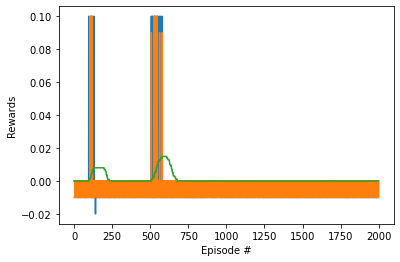

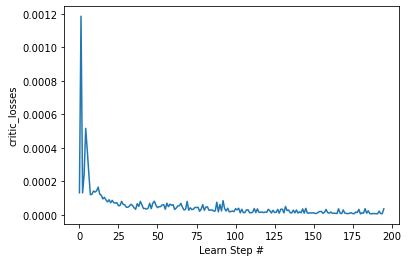

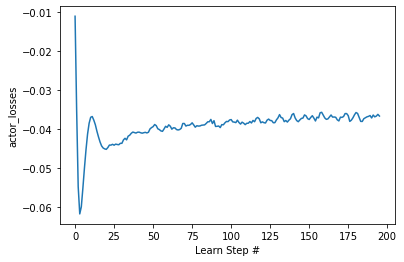

In [6]:
from ddpg_agent import ddpg_agent
import cProfile
DoProfile = False

config = {
    'gamma'               : 0.99,
    'tau'                 : 0.01,
    'action_size'         : action_size,
    'state_size'          : state_size,
    'hidden_size'         : 256,
    'buffer_size'         : 50000,
    'batch_size'          : 512,
    'dropout'             : 0.01,
    'seed'                : 88,
    'max_episodes'        : 2000,
    'learn_every'         : 10,
    'critic_learning_rate': 1e-3,
    'actor_learning_rate' : 1e-3,
    'noise_decay'         : 0.9995,
    'num_agents'          : num_agents,
    'env_file_name'       : env_file_name,
    'train_mode'          : True,
    'brain_name'          : brain_name}

def print_config(config):
    print('Config Parameters    : ')
    for c,k in config.items():
        print('{:20s} : {}'.format(c,k))

# seed_range = [0.1, 0.05, 0.03, 0.01, 0.005, 0.003, 0.001]
for main in range(1):#len(tau_range)):
    config['seed'] += 1
    print_config(config)
    agent = ddpg_agent(env, config)
    if DoProfile:cProfile.run("results = agent.train()",'PerfStats')
    else:results = agent.train()
    # all_rewards,avg_rewards,critic_losses,actor_losses = agent.train()
    print_config(config)
    plot_results(results)


env.close()

# 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```